In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Synthetic_mobile_txn.csv")
#data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
#money_launder=data.loc[data["isFraud"]==1]
money_launder=data[data["isFraud"]==1]
print("total number money launder: ", len(money_launder))
print("percentage of money launder: ", len(money_launder)/len(data)*100, "%")
#money_notlaunder=data[data["isFraud"]==0]
money_notlaunder=data.loc[data["isFraud"]==0]
print("total number non money launder: ", len(money_notlaunder))
print("percentage of non money launder: ", len(money_notlaunder)/len(data)*100, "%")


total number money launder:  8213
percentage of money launder:  0.12908204481801522 %
total number non money launder:  6354407
percentage of non money launder:  99.87091795518198 %


In [ ]:
data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Synthetic_mobile_txn.csv")
#data
#data.info()
#data.describe()
print("max amount: ", data["amount"].max())
print("min amount: ", data["amount"].min())
ML=data.loc[data["isFraud"]==1]
print("ML transcation: ", len(ML))
nonML=data.loc[data["isFraud"]==0]
print("non ML transaction: ",len(nonML))
print("total transaction: ", len(data))
print("% of ML transaction: ", (len(ML)/len(data))*100, "%")
print("% of nonML transaction: ", (len(nonML)/len(data))*100, "%")

max amount:  92445516.64
min amount:  0.0
ML transcation:  8213
non ML transaction:  6354407
total transaction:  6362620
% of ML transaction:  0.12908204481801522 %
% of nonML transaction:  99.87091795518198 %


In [ ]:
data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Synthetic_mobile_txn.csv")
#data
#data.info()
data.describe()
print("max amount: ", data["amount"].max())
print("min amount: ", data["amount"].min())
ML=data.loc[data["isFraud"]==1]
print("ML transcation: ", len(ML))
nonML=data.loc[data["isFraud"]==0]
print("non ML transaction: ",len(nonML))
print("total transaction: ", len(data))
print("% of ML transaction: ", (len(ML)/len(data))*100, "%")
print("% of nonML transaction: ", (len(nonML)/len(data))*100, "%")

max amount:  92445516.64
min amount:  0.0
ML transcation:  8213
non ML transaction:  6354407
total transaction:  6362620
% of ML transaction:  0.12908204481801522 %
% of nonML transaction:  99.87091795518198 %


#Data Exploration


In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
print("max amount", data["amount"].max())
print("min amont", data["amount"].min())

max amount 92445516.64
min amont 0.0


In [ ]:
ML_df=data[data["isFraud"]==1]
print (ML_df)
NoML_df=data[data["isFraud"]==0]
print(NoML_df)
print("total transactions is", len(data["isFraud"]))
print("total money laundering trasaction is ", len(ML_df))
print("percentage of money laundering transaction is ", (len(ML_df)/len(data["isFraud"])*100), "%")
print("total nonmoney laundering trasaction is ", len(NoML_df))
print("percentage of nonmoney laundering transaction is ", (len(NoML_df)/len(data["isFraud"])*100), "%")



         step      type      amount     nameOrig  oldbalanceOrg  \
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
251         1  TRANSFER     2806.00  C1420196421        2806.00   
252         1  CASH_OUT     2806.00  C2101527076        2806.00   
680         1  TRANSFER    20128.00   C137533655       20128.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
2                   0.0   C553264065            0.00            0.00        1   
3                   0.0    C38997

DATA VISUALIZATION


<Axes: >

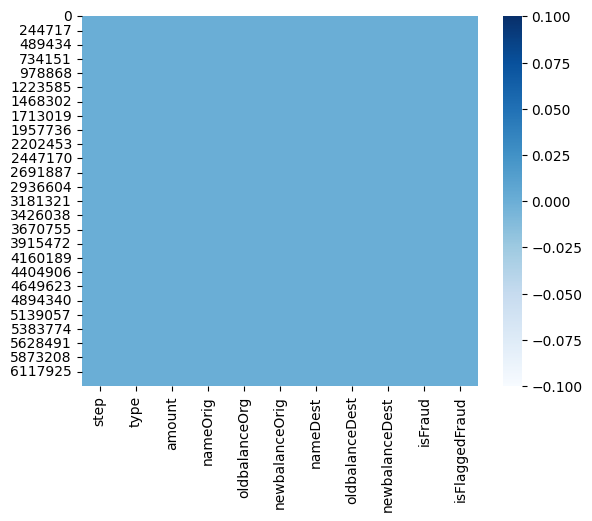

In [ ]:
#investigating if there is null values
sns.heatmap(data.isnull(), cmap="Blues")

<Axes: xlabel='type', ylabel='count'>

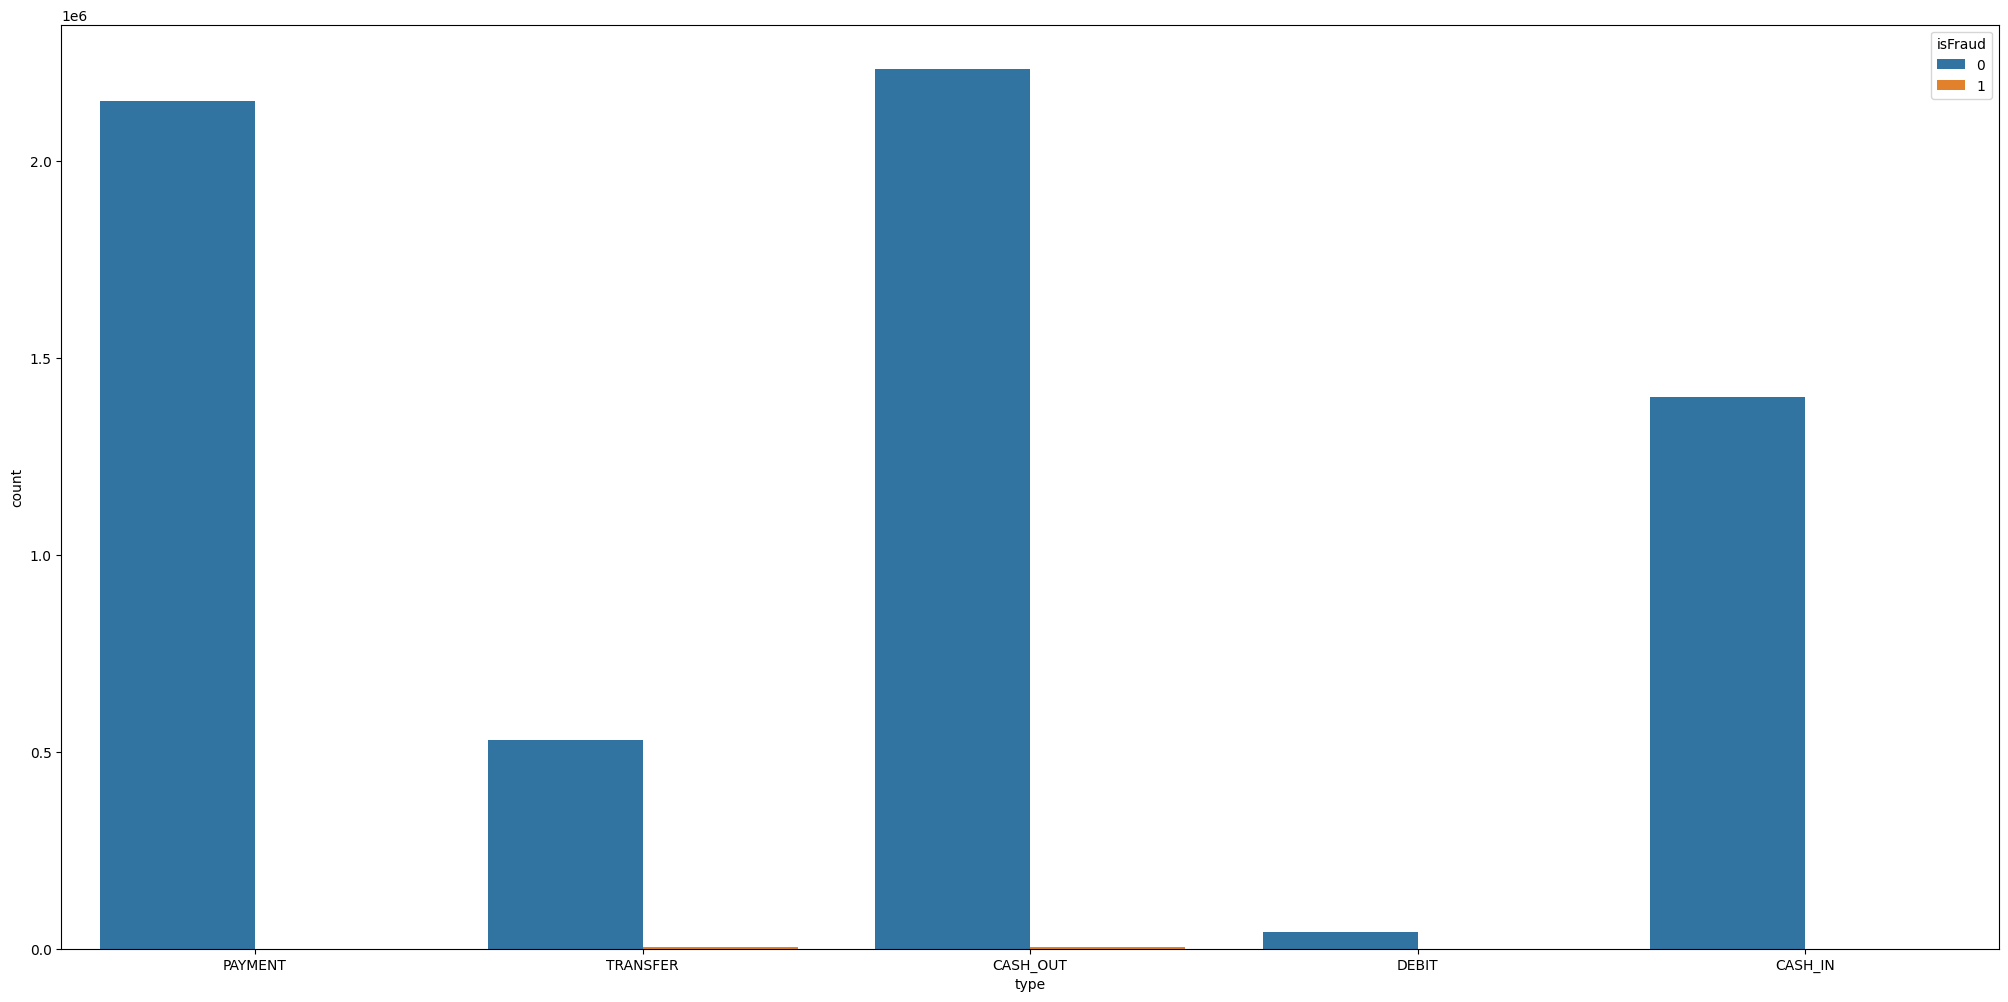

In [ ]:
#relationship between type of transaction and money laundering transactions
plt.figure(figsize=[25,12])
sns.countplot(data=data, x="type", hue="isFraud")

<ipython-input-9-e08ba6ffae3a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=ML_df["amount"], label="Money laundered txn", shade=True, color="r")
<ipython-input-9-e08ba6ffae3a>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=NoML_df["amount"], label="non money laundered txn", shade=True,color="b")


Text(0.5, 0, 'money laundering in comparison to amount')

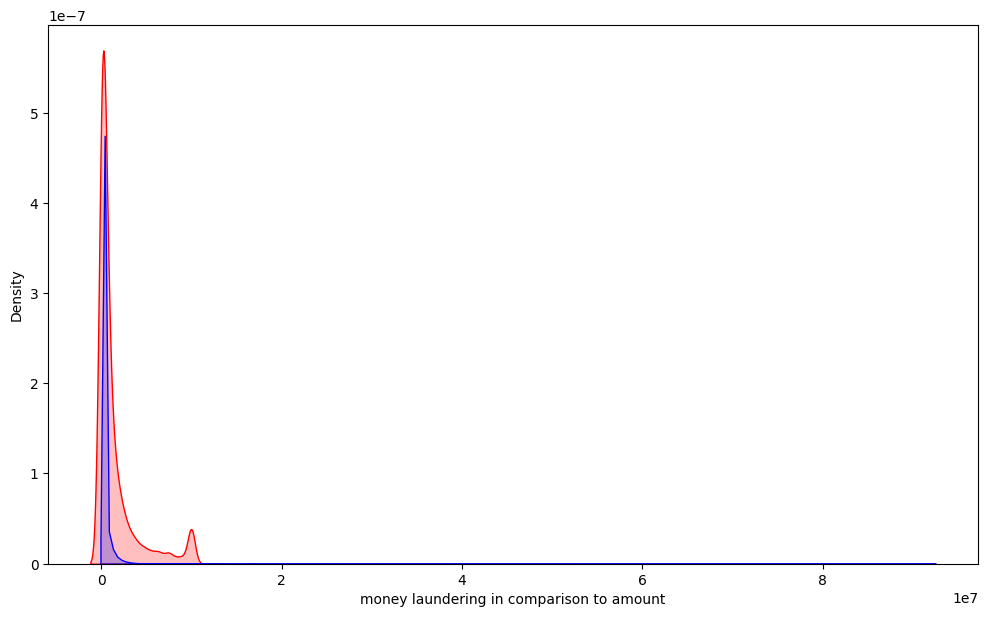

In [ ]:
plt.figure(figsize=(12,7))
sns.kdeplot(data=ML_df["amount"], label="Money laundered txn", shade=True, color="r")
sns.kdeplot(data=NoML_df["amount"], label="non money laundered txn", shade=True,color="b")
plt.xlabel("money laundering in comparison to amount")

<ipython-input-10-d1f2bb55e1d0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations=data.corr()


<Axes: >

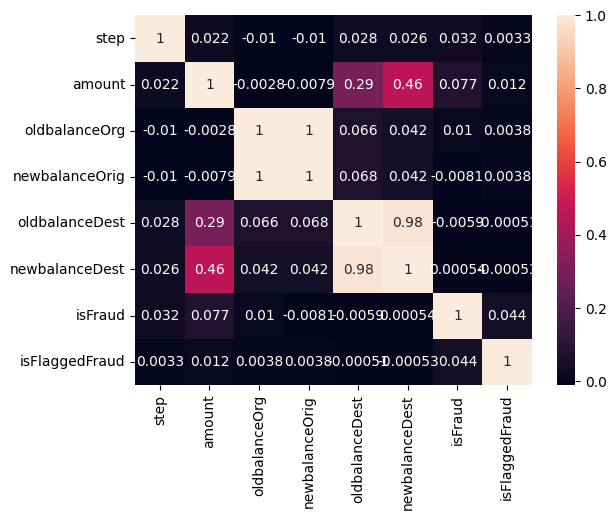

In [ ]:
correlations=data.corr()
#f, ax=plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True)

<ipython-input-13-e55c3a992105>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations=data.corr()


<Axes: >

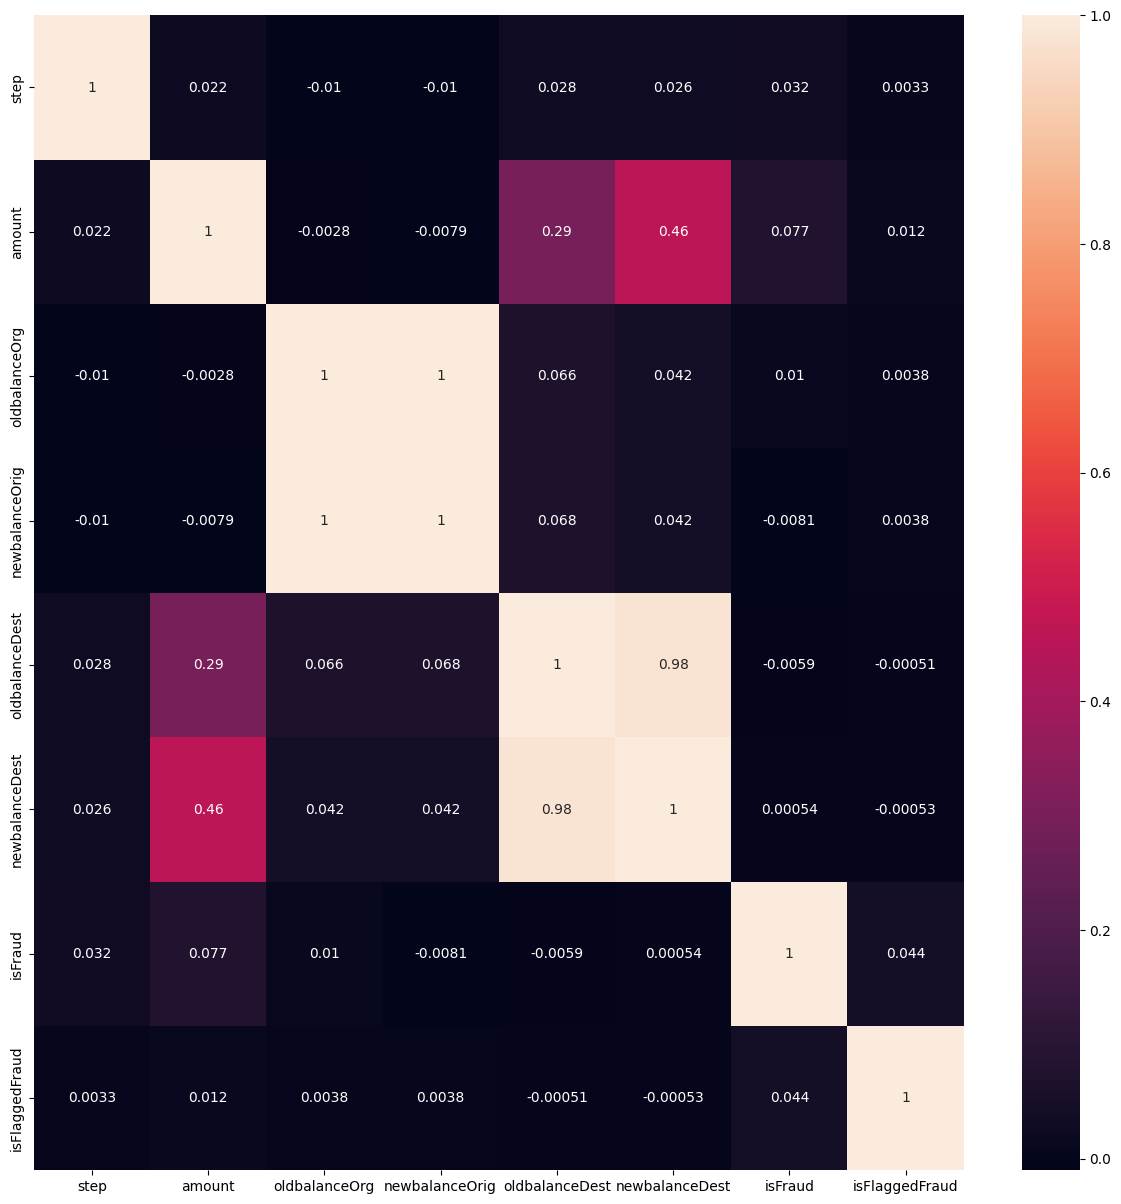

In [ ]:
correlations=data.corr()
#f, ax=plt.subplots(figsize=(15,15))
plt.subplots(figsize=(15,15))
sns.heatmap(correlations, annot=True)

Data processing/data normalization using standardscaler

In [ ]:
from sklearn.preprocessing import StandardScaler
col_names= ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]
features=data[col_names]
features
scaler=StandardScaler().fit(features.values)
scaler
features=scaler.transform(features.values)
features
scaled_features=pd.DataFrame(features, columns=col_names)
scaled_features

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411
1,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411
2,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411
3,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411
4,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411
...,...,...,...,...,...
6362615,0.264665,-0.171108,-0.292442,-0.323814,-0.240959
6362616,10.153953,1.896491,-0.292442,-0.323814,-0.333411
6362617,10.153953,1.896491,-0.292442,-0.303665,1.403027
6362618,1.109765,0.005581,-0.292442,-0.323814,-0.333411


In [ ]:
data_extract=data[["type"]]
data_extract
type_dummies=pd.get_dummies(data_extract["type"],drop_first=True)
type_dummies
newdataframe=pd.concat([data[["isFraud"]], type_dummies, scaled_features],axis=1, ignore_index=False)
newdataframe

,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0,0,0,1,0,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411
1,0,0,0,1,0,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411
2,1,0,0,0,1,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411
3,1,1,0,0,0,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411
4,0,0,0,1,0,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411
...,...,...,...,...,...,...,...,...,...,...
6362615,1,1,0,0,0,0.264665,-0.171108,-0.292442,-0.323814,-0.240959
6362616,1,0,0,0,1,10.153953,1.896491,-0.292442,-0.323814,-0.333411
6362617,1,1,0,0,0,10.153953,1.896491,-0.292442,-0.303665,1.403027
6362618,1,0,0,0,1,1.109765,0.005581,-0.292442,-0.323814,-0.333411


In [ ]:
from sklearn.preprocessing import StandardScaler  ##nomalized/standardised data
col_names=["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]
#features=data[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]]
features=data[col_names]
scaler=StandardScaler().fit(features.values)
scaler
features=scaler.transform(features.values)
scaled_features=pd.DataFrame(features, columns=col_names)
scaled_features
data_extract=data[["type"]]
data_extract
type_dummies=pd.get_dummies(data_extract["type"], drop_first=True)  ##one hot encoding to convert string to integer
#type_dummies
data_extract.drop(["type"], axis=1, inplace=True)
#data_extract
#new_data=pd.concat([data_extract, type_dummies, scaled_features], axis=1, ignore_index=False)
new_data=pd.concat([data[["isFraud"]],type_dummies, scaled_features], axis=1, ignore_index=False)
#new_data=pd.concat([data[["isFraud"]],data_extract,type_dummies, scaled_features], axis=1, ignore_index=False)
new_data

<ipython-input-7-f5d16b7ad851>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_extract.drop(["type"], axis=1, inplace=True)


,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0,0,0,1,0,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411
1,0,0,0,1,0,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411
2,1,0,0,0,1,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411
3,1,1,0,0,0,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411
4,0,0,0,1,0,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411
...,...,...,...,...,...,...,...,...,...,...
6362615,1,1,0,0,0,0.264665,-0.171108,-0.292442,-0.323814,-0.240959
6362616,1,0,0,0,1,10.153953,1.896491,-0.292442,-0.323814,-0.333411
6362617,1,1,0,0,0,10.153953,1.896491,-0.292442,-0.303665,1.403027
6362618,1,0,0,0,1,1.109765,0.005581,-0.292442,-0.323814,-0.333411


In [ ]:
from sklearn.preprocessing import StandardScaler
col_name=["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]
features=data[col_name]
scaleddata= StandardScaler().fit(features.values)
finalscaleddata=scaleddata.transform(features.values)
scaled_features=pd.DataFrame(finalscaleddata, columns=col_name)
data_extract=data[["type"]]
dummies=pd.get_dummies(data_extract["type"], drop_first=True)
newdata=pd.concat([data[["isFraud"]], dummies, scaled_features], axis=1, ignore_index=False)
newdata
checkfraudone=newdata[newdata["isFraud"]==0]
checkfraudone.head

<bound method NDFrame.head of          isFraud  CASH_OUT  DEBIT  PAYMENT  TRANSFER    amount  oldbalanceOrg  \
0              0         0      0        1         0 -0.281560      -0.229810   
1              0         0      0        1         0 -0.294767      -0.281359   
4              0         0      0        1         0 -0.278532      -0.274329   
5              0         0      0        1         0 -0.284908      -0.270068   
6              0         0      0        1         0 -0.286084      -0.225289   
...          ...       ...    ...      ...       ...       ...            ...   
6362319        0         0      0        1         0 -0.283556      -0.109091   
6362320        0         1      0        0         0 -0.034236      -0.287380   
6362321        0         1      0        0         0  0.010618      -0.230534   
6362322        0         0      0        0         1 -0.161901      -0.284045   
6362323        0         0      1        0         0 -0.294767      -0.281644  

train and deploy model

In [ ]:
x=new_data.iloc[:, new_data.columns!="isFraud"]
x
y=new_data.iloc[:, new_data.columns=="isFraud"]
y
x.shape
#y.head()
y.shape

(6362620, 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.3, random_state=0)
print("xtrain: ", x_train.shape)
print("ytarin: ", y_train.shape)
print("xtest: ", x_test.shape)
print("ytest: ", y_test.shape)

xtrain:  (1908786, 9)
ytarin:  (1908786, 1)
xtest:  (4453834, 9)
ytest:  (4453834, 1)


In [ ]:
from sklearn.model_selection import train_test_split
#from sklearn import model_selection
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.3, random_state=0)
#y_train.values.ravel()
len(x_train)

4453834

decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decisiontree= DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred=decisiontree.predict(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
#DecisionTreeClassifier()
y_pred=decision_tree.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906367
           1       0.89      0.89      0.89      2419

    accuracy                           1.00   1908786
   macro avg       0.95      0.94      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906367
           1       0.89      0.89      0.89      2419

    accuracy                           1.00   1908786
   macro avg       0.95      0.94      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786



In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
x_res, y_res=sm.fit_resample(x, y)
print(x_res.shape)
print(y_res.shape)
y_res.value_counts()
print(y_res[y_res["isFraud"]==0])
print(y_res[y_res["isFraud"]==1])

(12708814, 9)
(12708814, 1)
         isFraud
0              0
1              0
4              0
5              0
6              0
...          ...
6362319        0
6362320        0
6362321        0
6362322        0
6362323        0

[6354407 rows x 1 columns]
          isFraud
2               1
3               1
251             1
252             1
680             1
...           ...
12708809        1
12708810        1
12708811        1
12708812        1
12708813        1

[6354407 rows x 1 columns]


In [ ]:
from imblearn.over_sampling import SMOTE
sm =SMOTE(random_state=42)
x_res, y_res=sm.fit_resample(x, y)
x_train_res, x_test_res, y_train_res, y_test_res=train_test_split(x_res, y_res, test_size=0.3, random_state=0)
x_res.shape
decisiontree.fit(x_train_res, y_train_res)
y_pred_res=decisiontree.predict(x_test_res)
print(classification_report(y_test_res, y_pred_res))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1905975
           1       1.00      1.00      1.00   1906670

    accuracy                           1.00   3812645
   macro avg       1.00      1.00      1.00   3812645
weighted avg       1.00      1.00      1.00   3812645



In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
from sklearn.ensemble import RandomForestClassifier
random_forest= RandomForestClassifier()
random_forest.fit(x_train, y_train)
y_pre=random_forest.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pre))

<ipython-input-23-e97e56b0b0ad>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(x_train, y_train)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906367
           1       0.96      0.79      0.86      2419

    accuracy                           1.00   1908786
   macro avg       0.98      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
sm= SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x, y)
x_res_train, x_res_test, y_res_train, y_res_test = train_test_split(x_res, y_res, test_size=0.3, random_state=0)
randomforest = RandomForestClassifier()
randomforest.fit(x_res_train, y_res_train)
y_res_pre= randomforest.predict(x_res_test)
print(classification_report(y_res_test, y_res_pre))

<ipython-input-11-9d600745159c>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomforest.fit(x_res_train, y_res_train)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1905975
           1       1.00      1.00      1.00   1906670

    accuracy                           1.00   3812645
   macro avg       1.00      1.00      1.00   3812645
weighted avg       1.00      1.00      1.00   3812645



The metric score is 1.0 which is perfect, however, it's worth to investigate overfitting issue for this result by performing hyperparameter tuning and GridSearchCV